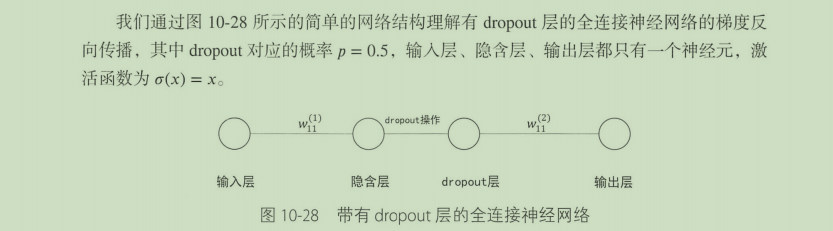

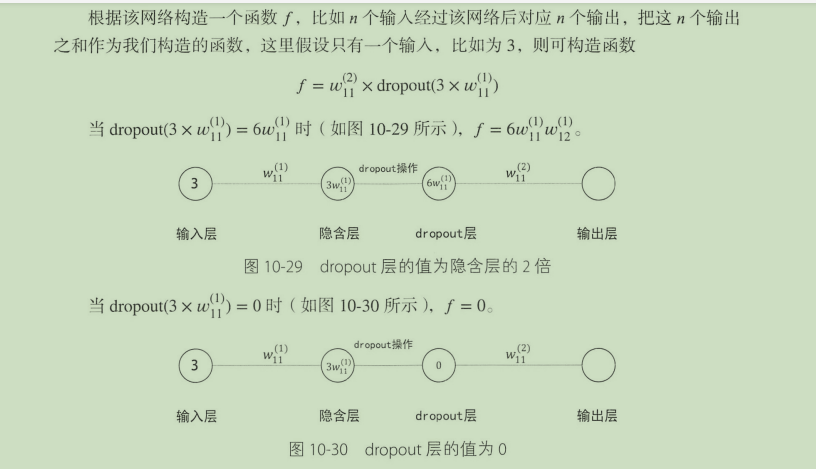

In [7]:
import tensorflow as tf
import numpy as np

#占位符， 已知数据
x=tf.placeholder(tf.float32,(None,1))
keep_prob=tf.placeholder(tf.float32)
#输入层到隐含层的权重矩阵
w1=tf.Variable(tf.constant([[10,]],tf.float32),dtype=tf.float32)
l1=tf.matmul(x,w1)
#dropout层
l1_dropout=tf.nn.dropout(l1, keep_prob)
#隐含层到输出层的权重矩阵
w2=tf.Variable(tf.constant([[6]],tf.float32), dtype=tf.float32)
l=tf.matmul(l1_dropout,w2)
#利用网络输出值构造函数f
f=tf.reduce_sum(l)

#梯度下降法
opti=tf.train.GradientDescentOptimizer(0.01).minimize(f)
#网络的输入值
x_array=np.array([[3]],np.float32)
# 4次迭代， 打印每一次迭代隐含层的值和网络权重
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for i in range(4):
        _,l1_dropout_array = session.run([opti,l1_dropout],
                                        {x:x_array,keep_prob:0.5})
        
        print('----第{}次迭代----'.format(i+1))
        print("dropout层的值")
        print(l1_dropout_array)
        print('网络当前的权重')
        print(session.run([w1,w2]))

----第1次迭代----
dropout层的值
[[0.]]
网络当前的权重
[array([[10.]], dtype=float32), array([[6.]], dtype=float32)]
----第2次迭代----
dropout层的值
[[0.]]
网络当前的权重
[array([[10.]], dtype=float32), array([[6.]], dtype=float32)]
----第3次迭代----
dropout层的值
[[0.]]
网络当前的权重
[array([[10.]], dtype=float32), array([[6.]], dtype=float32)]
----第4次迭代----
dropout层的值
[[60.]]
网络当前的权重
[array([[9.64]], dtype=float32), array([[5.4]], dtype=float32)]
